# Multi-metric runs
------------------------------

This example shows how to evaluate an atom's pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=1, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ====================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
---------------------------------------
Train set size: 456
Test set size: 113
---------------------------------------
|    | dataset   | train     | test     |
|---:|:----------|:----------|:---------|
|  0 | 212 (1.0) | 167 (1.0) | 45 (1.0) |
|  1 | 357 (1.7) | 289 (1.7) | 68 (1.5) |



In [4]:
# For every step of the BO, both metrics are calculated,
# but only the first is used for optimization!
atom.run(
    models=["lSVM", "QDA"],
    metric=("f1", "recall"),
    n_calls=10,
    n_initial_points=4,
    n_bootstrap=6,
)


Training ===================================== >>
Models: lSVM, QDA
Metric: f1, recall


Running BO for Linear-SVM...
Initial point 1 ---------------------------------
Parameters --> {'loss': 'squared_hinge', 'C': 46.003, 'penalty': 'l1', 'dual': False}
Evaluation --> f1: 0.9656  Best f1: 0.9656   recall: 0.9724  Best recall: 0.9724
Time iteration: 0.195s   Total time: 0.205s
Initial point 2 ---------------------------------
Parameters --> {'loss': 'squared_hinge', 'C': 0.015, 'penalty': 'l1', 'dual': False}
Evaluation --> f1: 0.9640  Best f1: 0.9656   recall: 0.9724  Best recall: 0.9724
Time iteration: 0.084s   Total time: 0.422s
Initial point 3 ---------------------------------
Parameters --> {'loss': 'hinge', 'C': 2.232, 'penalty': 'l2'}
Evaluation --> f1: 0.9723  Best f1: 0.9723   recall: 0.9791  Best recall: 0.9791
Time iteration: 0.073s   Total time: 0.521s
Initial point 4 ---------------------------------
Parameters --> {'loss': 'squared_hinge', 'C': 0.037, 'penalty': 'l2'}
Eva

## Analyze the results

In [5]:
# The columns in the results dataframe contain a list of
# scores, one for each metric (in the same order as called)
atom.results[["metric_bo", "metric_train", "metric_test"]]

,metric_bo,metric_train,metric_test
lSVM,"[0.982845769640169, 0.9930429522081065]","[0.9913941480206541, 0.9965397923875432]","[0.9784172661870503, 1.0]"
QDA,"[0.963998965582012, 0.9723532970356927]","[0.9691780821917808, 0.9792387543252595]","[0.9784172661870503, 1.0]"


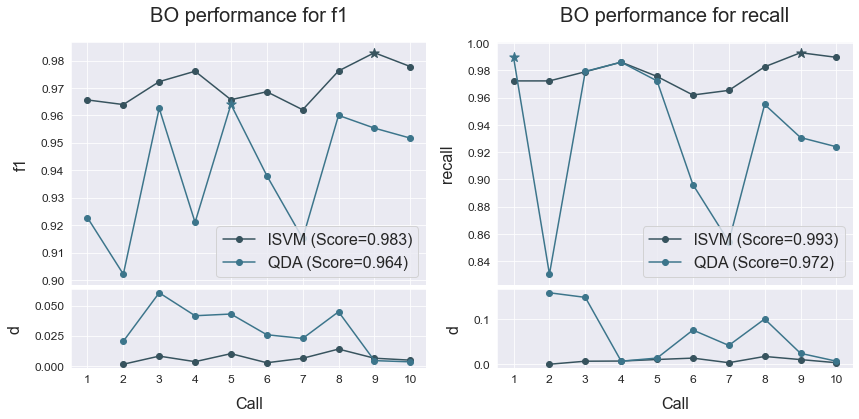

In [6]:
# Some plots allow us to choose the metric we want to show
with atom.canvas():
    atom.plot_bo(metric="f1", title="BO performance for f1")
    atom.plot_bo(metric="recall", title="BO performance for recall")

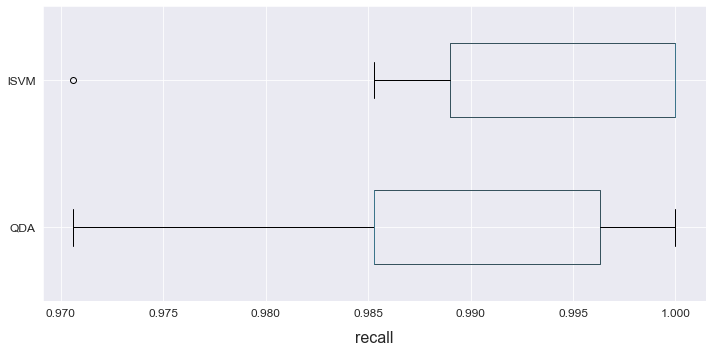

In [7]:
atom.plot_results(metric="recall")